In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X , y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
# 70,000 images with 784 features

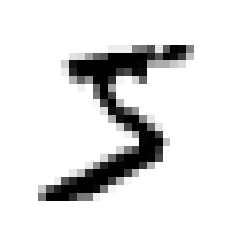

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt


some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [6]:
y[0]

'5'

In [7]:
import numpy as np
y= y.astype(np.uint8)

In [8]:
X_train , X_test , y_train , y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
#Stochastic Gradient Descent classifier (SGD)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5, scoring='accuracy')

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [14]:
#not 5

In [15]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X,y = None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf,X_train,y_train,cv = 3 ,scoring = 'accuracy')

array([0.0997 , 0.0965 , 0.09995])

In [16]:
#Confusion matrix

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf,X_train,y_train_5,cv =3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
#Precision and Recall

In [20]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_predict)


0.8370879772350012

In [21]:
recall_score(y_train_5,y_train_predict)

0.6511713705958311

In [22]:
#F1 score

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7325171197343846

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [26]:
threshold = 300
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
## This confirms that raising the threshold reduces the recall 

In [28]:
# How to decide which threshold to use?
'''-> first use the cross_val_predict() function to get the score of all
the instances, but specify -> method = 'decision_function' 
'''

"-> first use the cross_val_predict() function to get the score of all\nthe instances, but specify -> method = 'decision_function' \n"

In [29]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3,
                            method = 'decision_function')

In [30]:
from sklearn.metrics import precision_recall_curve

precisons, recalls , thresholds = precision_recall_curve(y_train_5,
                                                         y_scores
                                                         )



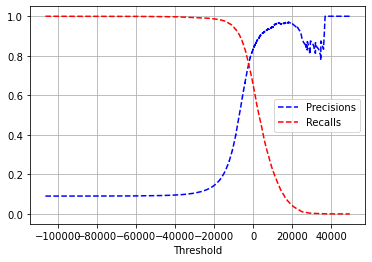

In [31]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisons,recalls,thresholds):
    plt.plot(thresholds, precisons[:-1],'b--',label = 'Precisions')
    plt.plot(thresholds, recalls[:-1],'r--',label = 'Recalls')
    plt.legend()
    plt.grid()
    plt.xlabel('Threshold')
plot_precision_recall_vs_threshold(precisons,recalls,thresholds)
plt.show()

In [32]:
threshold_90_precison = thresholds[np.argmax(precisons >= 0.90)]
threshold_90_precison

3370.0194991439557

In [33]:
y_train_pred_90 = (y_scores >= threshold_90_precison)


In [34]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [35]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr , thresholds = roc_curve(y_train_5,y_scores)


In [37]:
#plot the fpr against tpr

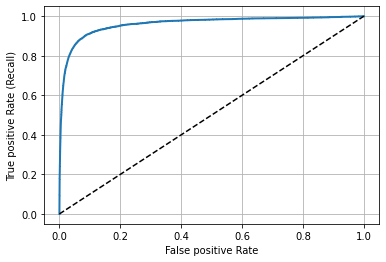

In [38]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2 , label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid()
    plt.xlabel('False positive Rate')
    plt.ylabel('True positive Rate (Recall)')

plot_roc_curve(fpr,tpr)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [40]:
#Randomforest Roc curve vs SGD ROC curve

In [41]:
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf,X_train,y_train_5
                                  ,cv = 3 , method='predict_proba')

In [42]:
y_scores_forest = y_proba_forest[:,1]
fpr_forest , tpr_forest , thresholds_forest = roc_curve(y_train_5,
                                                       y_scores_forest)



<function matplotlib.pyplot.show(*args, **kw)>

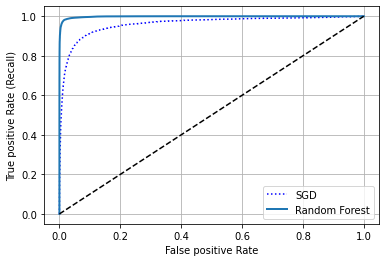

In [43]:
plt.plot(fpr,tpr,'b:',label = 'SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show

In [44]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145